<a href="https://colab.research.google.com/github/AMMLRepos/crab-age-prediction/blob/main/Crab_age_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview 
Crab farming is a major aquaculture activity as there is a huge consumption demand of crabs in India. Commercial crab farming is a growing business in coastal areas of India and is looking profitable.
Mud crab is highly popular due to its great demand in the export market. The commercial scale mud crab culture is developing fast along the coastal areas of Andhra Pradesh, Tamil Nadu, Kerala and Karnataka.

# About Mud Crabs 
## Larger species :
The larger species is locally known as `green mud crab'. It grows to a maximum size of 22 cm carapace width and 2 kg in weight.

## Smaller species :
The smaller species is known as `red claw'. This grows to a maximum size of 12.7 cm carapace width and 1.2 kg in weight.

For more about Mud crab farming, please visit [this link](https://vikaspedia.in/agriculture/fisheries/brackish-water-fisheries/culture-fisheries/mud-crab-culture#:~:text=Mud%20crab%20farming%20is%20done,based%2C%20with%20or%20without%20mangroves.)
To understand more on Mud crab, visit [this link](https://www.fish.wa.gov.au/Documents/recreational_fishing/fact_sheets/fact_sheet_mud_crab.pdf)
 

# Business Problem
For a commercial crab farmer knowing the right age of the crab helps them decide if and when to harvest the crabs. Beyond a certain age, there is negligible growth in crab's physical characteristics and hence, it is important to time the harvesting to reduce cost and increase profit.

# About data
We have our dataset publicly available on [Kaggle](https://www.kaggle.com/sidhus/crab-age-prediction). The dataset has following columns - 

- Sex : Gender of crab (Male and Female)
- Length : Lenght of crab in 
- Diameter : Diameter of crab in 
- Height : Height of crab in 
- Weight : Weight of crab in 
- Shucked Weight : Weight of crab without shell
- Viscera Weight : is weight that wraps around your abdominal organs deep inside body
- Shell Weight : Weight of shell
- Age : Age of crab in months



# Importing required libraries and downloading dataset

In [73]:
!pip install opendatasets

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od 

In [75]:
import opendatasets as od
import os 
dataset_url = "https://www.kaggle.com/sidhus/crab-age-prediction"
od.download(dataset_url)

Skipping, found downloaded files in "./crab-age-prediction" (use force=True to force download)


In [76]:
files = os.listdir("crab-age-prediction")
print(files)

['CrabAgePrediction.csv']


In [77]:
filepath = "crab-age-prediction/CrabAgePrediction.csv"

In [78]:
crab_df = pd.read_csv(filepath)
crab_df

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
...,...,...,...,...,...,...,...,...,...
3888,F,1.4625,1.1375,0.3250,24.819987,11.651645,5.854172,6.378637,8
3889,F,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10
3890,I,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5
3891,I,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976697,6


In [79]:
crab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [80]:
crab_df.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662132,10.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491247,29.000000


# Exploratory data analysis
Let us perform the basic exploration on the dataset and figure out relationships between various columns / features with Age

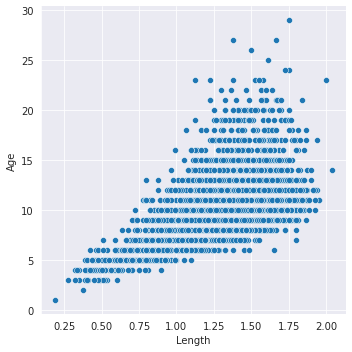

In [81]:
sns.relplot(x = "Length", y = "Age", data = crab_df)

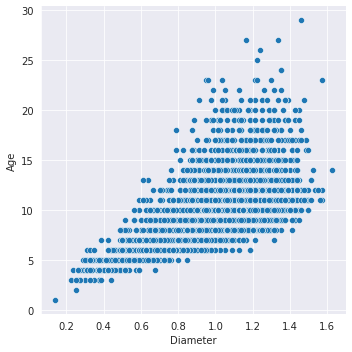

In [82]:
sns.relplot(x = "Diameter", y = "Age", data = crab_df)

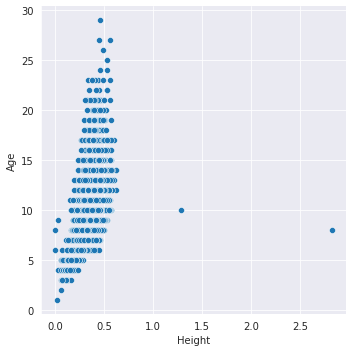

In [83]:
sns.relplot(x = "Height", y = "Age", data = crab_df)

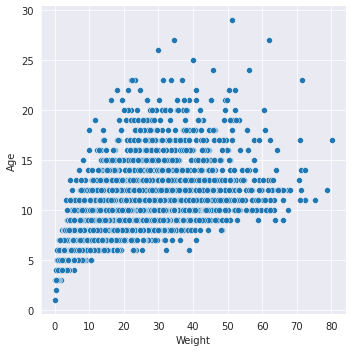

In [84]:
sns.relplot(x = "Weight", y = "Age", data = crab_df)

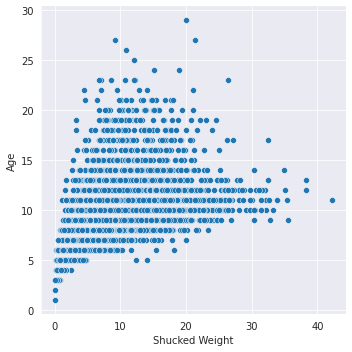

In [85]:
sns.relplot(x = "Shucked Weight", y = "Age", data = crab_df)

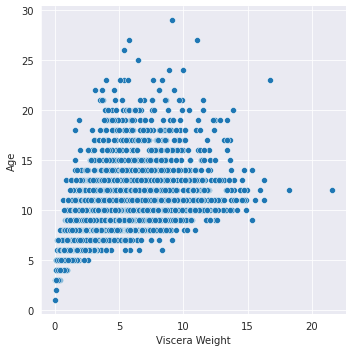

In [86]:
sns.relplot(x = "Viscera Weight", y = "Age", data = crab_df)

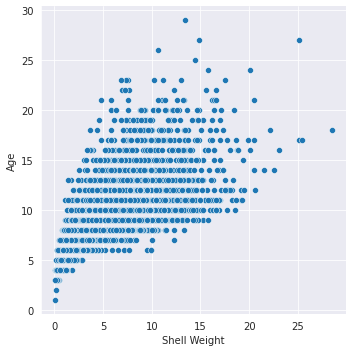

In [87]:
sns.relplot(x = "Shell Weight", y = "Age", data = crab_df)

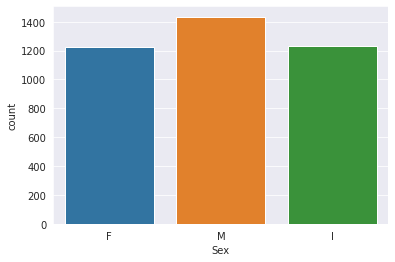

In [88]:
sns.countplot(x = "Sex", data = crab_df)

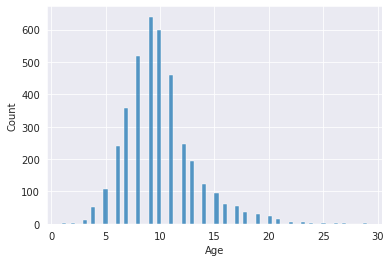

In [89]:
sns.histplot(data = crab_df, x = "Age")

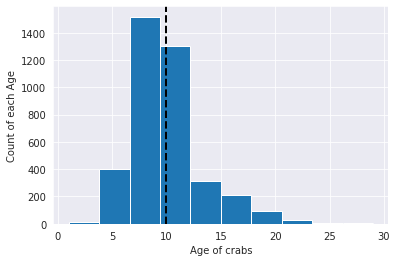

In [90]:
plt.hist(crab_df["Age"]);
plt.axvline(crab_df["Age"].mean(), color='k', linestyle='dashed', linewidth=2)
plt.xlabel("Age of crabs")
plt.ylabel("Count of each Age")

plt.show()

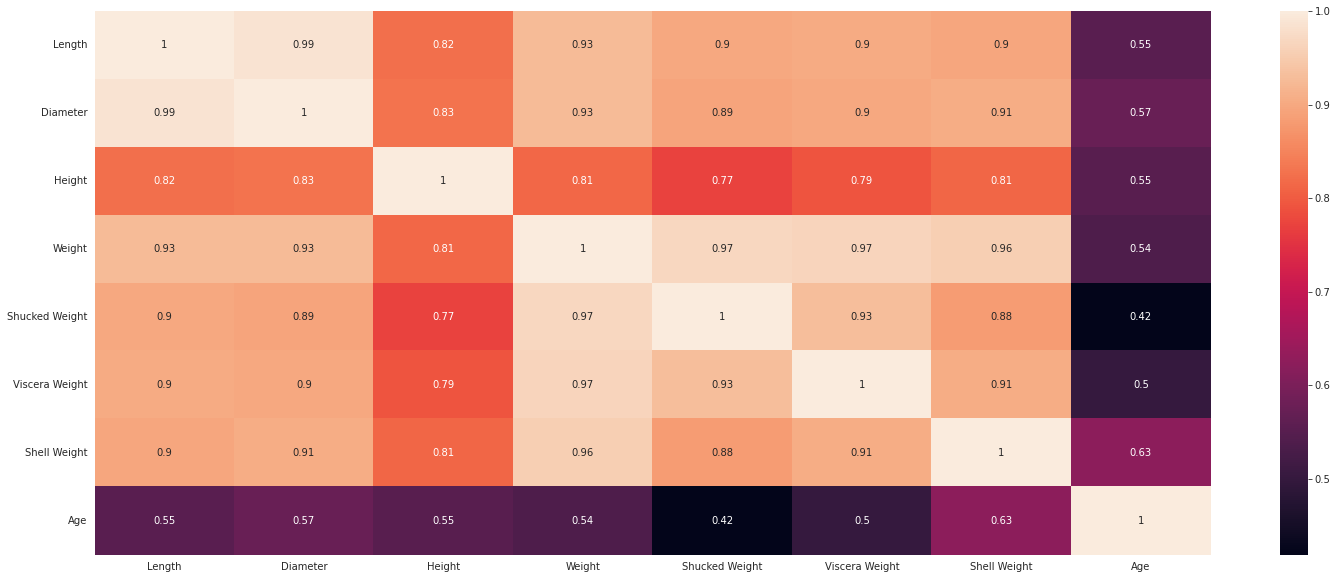

In [91]:
plt.figure(figsize = (25,10))
sns.heatmap(crab_df.corr(), annot = True)

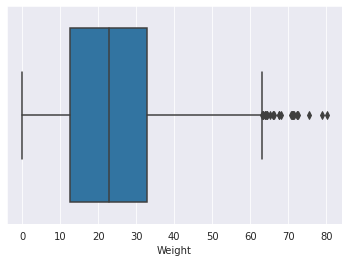

In [92]:
sns.set_style("darkgrid")
sns.boxplot(x = "Weight", data = crab_df)

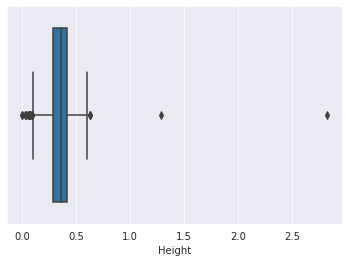

In [93]:
sns.set_style("darkgrid")
sns.boxplot(x = "Height", data = crab_df)

# Preparing data for training

Listing out of all columns 

In [94]:
crab_df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')

Let us encode Sex column into 0 and 1 for male and female 

In [95]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
crab_df['Gender'] = le.fit_transform(crab_df['Sex'])

Since there are 3 genders, let us do one hot encoding

In [96]:
crab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
 9   Gender          3893 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 304.3+ KB


In [97]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()
crab_sex_df = pd.DataFrame(onehot.fit_transform(crab_df[['Sex']]).toarray())
crab_df = crab_df.join(crab_sex_df)

In [98]:
crab_df

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Gender,0,1,2
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,0,1.0,0.0,0.0
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,2,0.0,0.0,1.0
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,1,0.0,1.0,0.0
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,0,1.0,0.0,0.0
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,1,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3888,F,1.4625,1.1375,0.3250,24.819987,11.651645,5.854172,6.378637,8,0,1.0,0.0,0.0
3889,F,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10,0,1.0,0.0,0.0
3890,I,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5,1,0.0,1.0,0.0
3891,I,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976697,6,1,0.0,1.0,0.0


In [99]:
#Renaming columns 
#df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)
crab_df.rename(columns = {0: "Female", 1: "Intermediate", 2 : "Male"}, inplace = True)

In [100]:
crab_df

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Gender,Female,Intermediate,Male
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,0,1.0,0.0,0.0
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,2,0.0,0.0,1.0
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,1,0.0,1.0,0.0
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,0,1.0,0.0,0.0
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,1,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3888,F,1.4625,1.1375,0.3250,24.819987,11.651645,5.854172,6.378637,8,0,1.0,0.0,0.0
3889,F,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10,0,1.0,0.0,0.0
3890,I,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5,1,0.0,1.0,0.0
3891,I,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976697,6,1,0.0,1.0,0.0


#Drop columns of no interest 

In [101]:
crab_df.drop(columns = ["Sex", "Gender"], inplace = True)

In [102]:
crab_df.columns

Index(['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age', 'Female', 'Intermediate',
       'Male'],
      dtype='object')

In [103]:
X = crab_df[['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Female', 'Intermediate',
       'Male']]

y = crab_df["Age"]

# Splitting data 

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [106]:
X_train.shape

(3114, 10)

In [107]:
X_test.shape

(779, 10)

In [108]:
y_train.shape

(3114,)

In [109]:
y_test.shape

(779,)

# Training model

In [112]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

# Model Evaluation

In [114]:
lm.intercept_

3.8023087411683374

In [115]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns = ['Coefficient'])
coeff_df

,Coefficient
Length,-0.622133
Diameter,4.961933
Height,3.779713
Weight,0.357442
Shucked Weight,-0.726636
Viscera Weight,-0.442120
Shell Weight,0.271032
Female,0.243472
Intermediate,-0.548904
Male,0.305433


# Making predictions using test data

In [117]:
predictions = lm.predict(X_test)

# Model metrics

In [118]:
from sklearn import metrics
print("MEA", metrics.mean_absolute_error(y_test, predictions))

MEA 1.5842563254741842


In [119]:
print("MSE", metrics.mean_squared_error(y_test, predictions))

MSE 4.859145605789454


In [121]:
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE 2.204346979445263
